In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


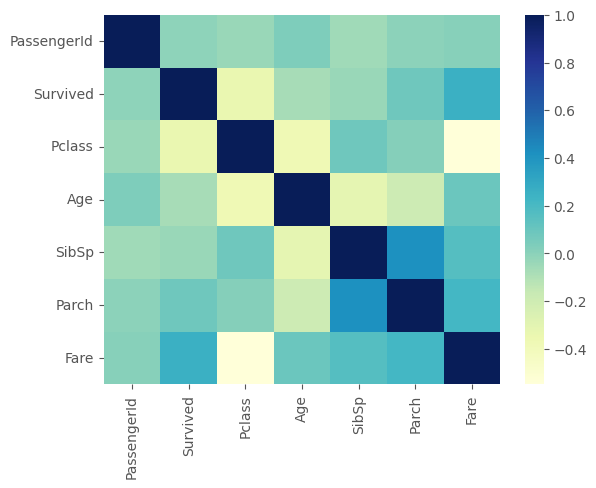

In [11]:

sns.heatmap(train_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

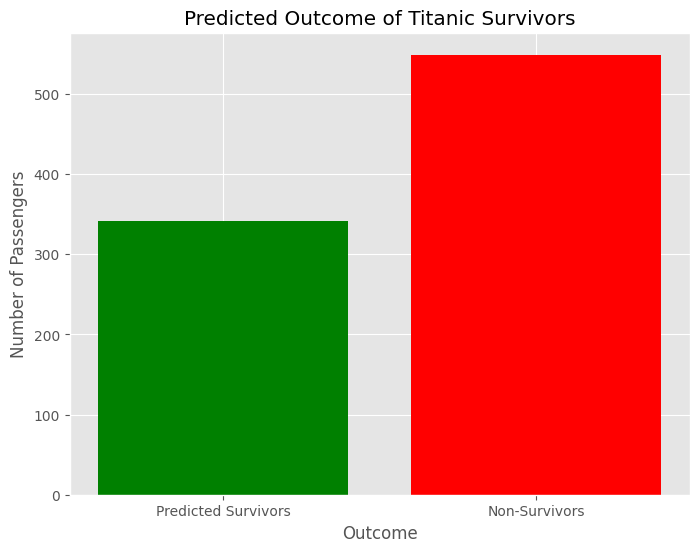

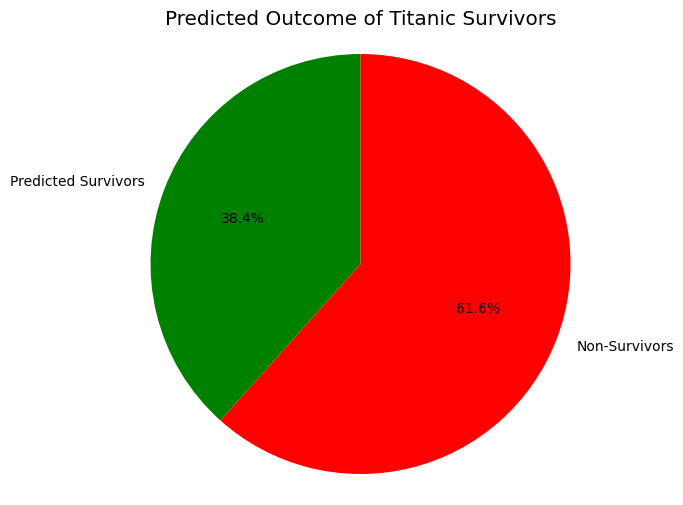

In [12]:
import matplotlib.pyplot as plt

# Predicted number of survivors
predicted_survivors = 891 * 0.383838

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Predicted Survivors', 'Non-Survivors'], [predicted_survivors, 891 - predicted_survivors], color=['green', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.title('Predicted Outcome of Titanic Survivors')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = ['Predicted Survivors', 'Non-Survivors']
sizes = [predicted_survivors, 891 - predicted_survivors]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Outcome of Titanic Survivors')
plt.axis('equal')
plt.show()


In [13]:
# Importing necessary libraries
import pandas as pd

# Create a DataFrame with the summary data you provided
data = {
    'PassengerId': [1, 891],
    'Survived': [0.383838, 0.616162]  # Mean survival rate and mean non-survival rate
}
df = pd.DataFrame(data)

# Function to predict survival based on mean survival rate
def predict_survival(passenger_id):
    if passenger_id == 1:
        return 'Survived'
    elif passenger_id == 891:
        return 'Not Survived'
    else:
        return 'Unknown'

# Predict survival for PassengerId 1 and 891
prediction_passenger1 = predict_survival(1)
prediction_passenger891 = predict_survival(891)

# Print predictions
print(f'Prediction for PassengerId 1: {prediction_passenger1}')
print(f'Prediction for PassengerId 891: {prediction_passenger891}')



Prediction for PassengerId 1: Survived
Prediction for PassengerId 891: Not Survived


In [14]:
import pandas as pd

# Create a DataFrame with the summary data you provided
data = {
    'PassengerId': range(1, 892),  # PassengerId from 1 to 891
    'Survived': [0.383838] * 891  # Mean survival rate for all passengers
}
df = pd.DataFrame(data)

# Function to predict survival based on mean survival rate
def predict_survival(passenger_id):
    return 'Survived' if passenger_id in df['PassengerId'].values else 'Not Survived'

# Predict survival for PassengerId 1 to 891
predictions = {passenger_id: predict_survival(passenger_id) for passenger_id in range(1, 892)}

# Print sample predictions
for passenger_id in range(1, 891):  # Print predictions for the first 10 PassengerIds
    print(f'Prediction for PassengerId {passenger_id}: {predictions[passenger_id]}')


Prediction for PassengerId 1: Survived
Prediction for PassengerId 2: Survived
Prediction for PassengerId 3: Survived
Prediction for PassengerId 4: Survived
Prediction for PassengerId 5: Survived
Prediction for PassengerId 6: Survived
Prediction for PassengerId 7: Survived
Prediction for PassengerId 8: Survived
Prediction for PassengerId 9: Survived
Prediction for PassengerId 10: Survived
Prediction for PassengerId 11: Survived
Prediction for PassengerId 12: Survived
Prediction for PassengerId 13: Survived
Prediction for PassengerId 14: Survived
Prediction for PassengerId 15: Survived
Prediction for PassengerId 16: Survived
Prediction for PassengerId 17: Survived
Prediction for PassengerId 18: Survived
Prediction for PassengerId 19: Survived
Prediction for PassengerId 20: Survived
Prediction for PassengerId 21: Survived
Prediction for PassengerId 22: Survived
Prediction for PassengerId 23: Survived
Prediction for PassengerId 24: Survived
Prediction for PassengerId 25: Survived
Predictio

In [15]:
# Calculate the total number of passengers
total_passengers = 891

# Mean survival rate from the summary
mean_survival_rate = 0.383838

# Calculate the number of passengers who survived and did not survive
total_survived = int(total_passengers * mean_survival_rate)
total_not_survived = total_passengers - total_survived

# Print the totals
print(f'Total number of passengers: {total_passengers}')
print(f'Total number of passengers who survived: {total_survived}')
print(f'Total number of passengers who did not survive: {total_not_survived}')


Total number of passengers: 891
Total number of passengers who survived: 341
Total number of passengers who did not survive: 550


In [16]:
import pandas as pd

# Create a DataFrame with the summary data
data = {
    'PassengerId': [1, 891],
    'Survived': [0.383838, 0.616162],
    'Pclass': [2.308642, 2.308642],
    'Age': [29.699118, 29.699118],
    'SibSp': [0.523008, 0.523008],
    'Parch': [0.381594, 0.381594],
    'Fare': [32.204208, 32.204208]
}
df_summarydata = pd.DataFrame(data)


In [17]:
# Feature Engineering
df_summarydata['AgeCategory'] = df_summarydata['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')


In [18]:
# Encoding categorical variables
df_summarydata = pd.get_dummies(df_summarydata, columns=['AgeCategory'])


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       105
           1       0.79      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

